In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sub_hydro_static import FloaterParameters, Density, CrossSectionalArea, Buoy, Mass, GeneralisedCoordinateSystem 
from GeniE_command import CompHydroCoefficient
from _read_wadam_lis import ReadWadamLis
from _read_wadam_lis import ReadWadamLis

Unable to import mpi4py. Parallel processing unavailable.
Unable to import petsc4py. Parallel processing unavailable.
Unable to import petsc4py. Parallel processing unavailable.


In [3]:
floater = FloaterParameters(60, 60, 14)
rho = Density()
area = CrossSectionalArea(floater)
buoy = Buoy(floater, area, rho)
mass = Mass(floater, area, buoy, rho)
coord = GeneralisedCoordinateSystem(floater, area, mass, rho, buoy)
genie = CompHydroCoefficient()
genie.compute(coord, mass, floater)
sim = ReadWadamLis(genie.HydroD_result)

## System properties

#### 1. Mass allocation

In [4]:
coord.mass_df

,x,y,z,Mass [kg],weight_contribution
Component,,,,,
Front Ballast,0,0.000,-13.051298,1.490218e+06,0.195762
Back Left Ballast,-60,-30.000,-13.528434,7.407334e+05,0.097306
Back Right Ballast,-60,30.000,-13.528434,7.407334e+05,0.097306
Front Column,0,0.000,-6.000000,6.904814e+05,0.090705
Back Left Column,-60,-30.000,-6.000000,6.904814e+05,0.090705
Back Right Column,-60,30.000,-6.000000,6.904814e+05,0.090705
Front Heave Plate,0,0.000,-13.000000,3.567646e+05,0.046866
Back Left Heave Plate,-60,-30.000,-13.000000,3.567646e+05,0.046866
Back Right Heave Plate,-60,30.000,-13.000000,3.567646e+05,0.046866


#### 2. Buoyancy allocation

In [5]:
coord.buoy_df

,x,y,z,Buoy [kg],buoy_contribution
Component,,,,,
Front Column Buoy,0,0.0,-6.0,1.893438e+06,0.248731
Back Left Column Buoy,-60,30.0,-6.0,1.893438e+06,0.248731
Back Right Column Buoy,-60,-30.0,-6.0,1.893438e+06,0.248731
Front Heave Buoy,0,0.0,-13.0,6.440265e+05,0.084602
Back Left Heave Buoy,-60,30.0,-13.0,6.440265e+05,0.084602
Back Right Heave Buoy,-60,-30.0,-13.0,6.440265e+05,0.084602


####  3. System centre of Mass

In [6]:
coord.COM

[-39.99999999999999, 0.0, 3.7635041394219737]

####  4. System centre of Buoy

In [7]:
coord.COB

[-39.99999999999999, 0.0, -7.776649746192893]

####  5. Distance between COM and COB

In [8]:
coord.COB[2] - coord.COM[2]

-11.540153885614867

####  6. Radius of Gyration

In [9]:
coord.RoG

[46.643566981664705, 42.23136314443424, 44.633331801871606]

##### To find classes within an object use dir(object) 

In [10]:
dir(coord)

['COB',
 'COM',
 'RoG',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'ballastbackL',
 'ballastbackR',
 'ballastfront',
 'buoy_columnbackL',
 'buoy_columnbackR',
 'buoy_columnfront',
 'buoy_df',
 'buoy_heavebackL',
 'buoy_heavebackR',
 'buoy_heavefront',
 'columnbackL',
 'columnbackR',
 'columnfront',
 'heavebackL',
 'heavebackR',
 'heavefront',
 'hubL',
 'hubR',
 'mass_df',
 'rog_df',
 'towerL',
 'towerR']

In [11]:
mass.total

7612393.158913428

In [12]:
coord.RoG

[46.643566981664705, 42.23136314443424, 44.633331801871606]

In [13]:
coord.COM

[-39.99999999999999, 0.0, 3.7635041394219737]

In [14]:
coord.rog_df

,x,y,z,Mass [kg],I_x,I_y,I_z
Component,,,,,,,
Front Ballast,40.0,0.000,-16.814802,1.490218e+06,4.213407e+08,2.805690e+09,2.384349e+09
Back Left Ballast,-20.0,-30.000,-17.291939,7.407334e+05,8.881476e+08,5.177809e+08,9.629534e+08
Back Right Ballast,-20.0,30.000,-17.291939,7.407334e+05,8.881476e+08,5.177809e+08,9.629534e+08
Front Column,40.0,0.000,-9.763504,6.904814e+05,6.582084e+07,1.170591e+09,1.104770e+09
Back Left Column,-20.0,-30.000,-9.763504,6.904814e+05,6.872541e+08,3.420134e+08,8.976258e+08
Back Right Column,-20.0,30.000,-9.763504,6.904814e+05,6.872541e+08,3.420134e+08,8.976258e+08
Front Heave Plate,40.0,0.000,-16.763504,3.567646e+05,1.002562e+08,6.710796e+08,5.708234e+08
Back Left Heave Plate,-20.0,-30.000,-16.763504,3.567646e+05,4.213444e+08,2.429621e+08,4.637940e+08
Back Right Heave Plate,-20.0,30.000,-16.763504,3.567646e+05,4.213444e+08,2.429621e+08,4.637940e+08


In [15]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [16]:
plt.rcParams["figure.figsize"] = (20,20)
styles = [['-b','-g','-r','-b','-g','-r'],
          ['--b','--g','--r','--b','--g','--r'],
          [':b',':g',':r',':b',':g',':r'],
          ['-.b','-.g','-.r','-.b','-.g','-.r'],
          ['bo--','go--','ro--','bo--','go--','ro--'],
          ['b+--','g+--','r+--','b+--','g+--','r+--']]
legend_A = [['A11','A12','A13','A14','A15','A16'],
         ['A21','A22','A23','A24','A25','A26'],
         ['A31','A32','A33','A34','A35','A36'],
         ['A41','A42','A43','A44','A45','A46'],
         ['A51','A52','A53','A54','A55','A56'],
         ['A61','A62','A63','A64','A65','A66']]

In [17]:
legend_D = [['D11','D12','D13','D14','D15','D16'],
         ['D21','D22','D23','D24','D25','D26'],
         ['D31','D32','D33','D34','D35','D36'],
         ['D41','D42','D43','D44','D45','D46'],
         ['D51','D52','D53','D54','D55','D56'],
         ['D61','D62','D63','D64','D65','D66']]

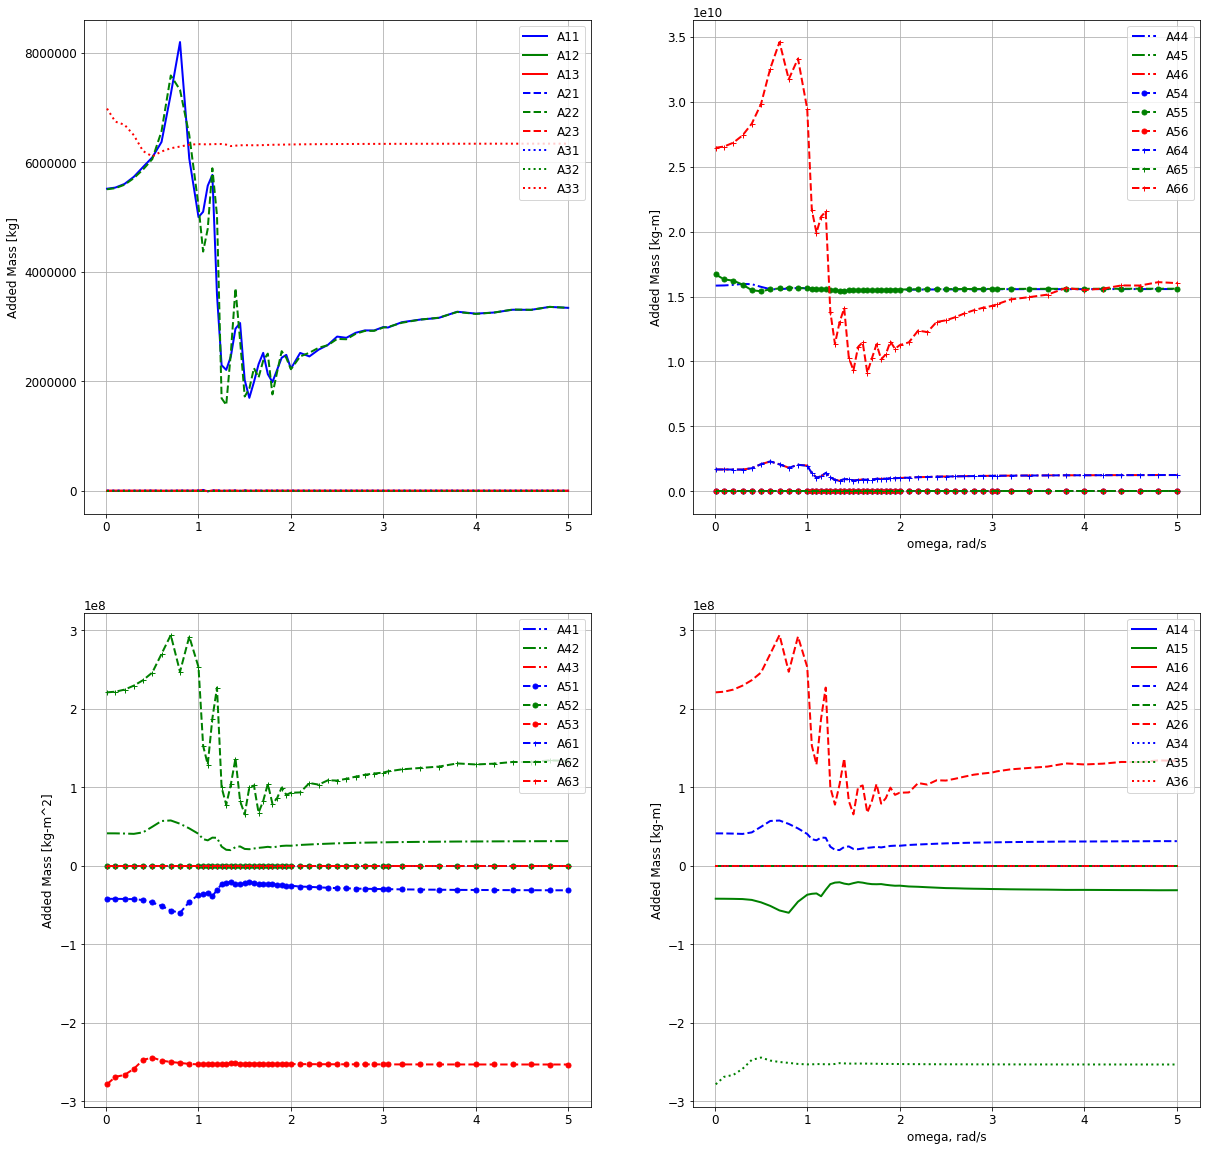

In [23]:
fig, axs = plt.subplots(2, 2)
for ii in np.linspace(0,2,3).astype(int):
    for jj in np.linspace(0,2,3).astype(int):
        axs[0, 0].plot(sim.wave_disc[:,4],sim.ADDEDMASS[:,ii,jj],styles[ii][jj], label=legend_A[ii][jj], linewidth=2, markersize=5)
axs[0,0].legend(loc="upper right")
axs[0,0].set(ylabel='Added Mass [kg]')
axs[0,0].grid(b=True, which='both', axis = 'both')

for ii in np.linspace(3,5,3).astype(int):
    for jj in np.linspace(0,2,3).astype(int):
        axs[1, 0].plot(sim.wave_disc[:,4],sim.ADDEDMASS[:,ii,jj],styles[ii][jj], label=legend_A[ii][jj], linewidth=2, markersize=5)        
axs[1,0].legend(loc="upper right")
axs[1,0].set(ylabel='Added Mass [kg-m^2]')
axs[1,0].grid(b=True, which='both', axis = 'both')
        
for ii in np.linspace(0,2,3).astype(int):
    for jj in np.linspace(3,5,3).astype(int):
        axs[1, 1].plot(sim.wave_disc[:,4],sim.ADDEDMASS[:,ii,jj],styles[ii][jj], label=legend_A[ii][jj], linewidth=2, markersize=5)            
axs[1,1].legend(loc="upper right")        
axs[1,1].set(xlabel='omega, rad/s', ylabel='Added Mass [kg-m]')
axs[1,1].grid(b=True, which='both', axis = 'both')
        
for ii in np.linspace(3,5,3).astype(int):
    for jj in np.linspace(3,5,3).astype(int):
        axs[0, 1].plot(sim.wave_disc[:,4],sim.ADDEDMASS[:,ii,jj],styles[ii][jj], label=legend_A[ii][jj], linewidth=2, markersize=5)  
axs[0,1].legend(loc="upper right")        
axs[0,1].set(xlabel='omega, rad/s', ylabel='Added Mass [kg-m]')
axs[0,1].grid(b=True, which='both', axis = 'both')

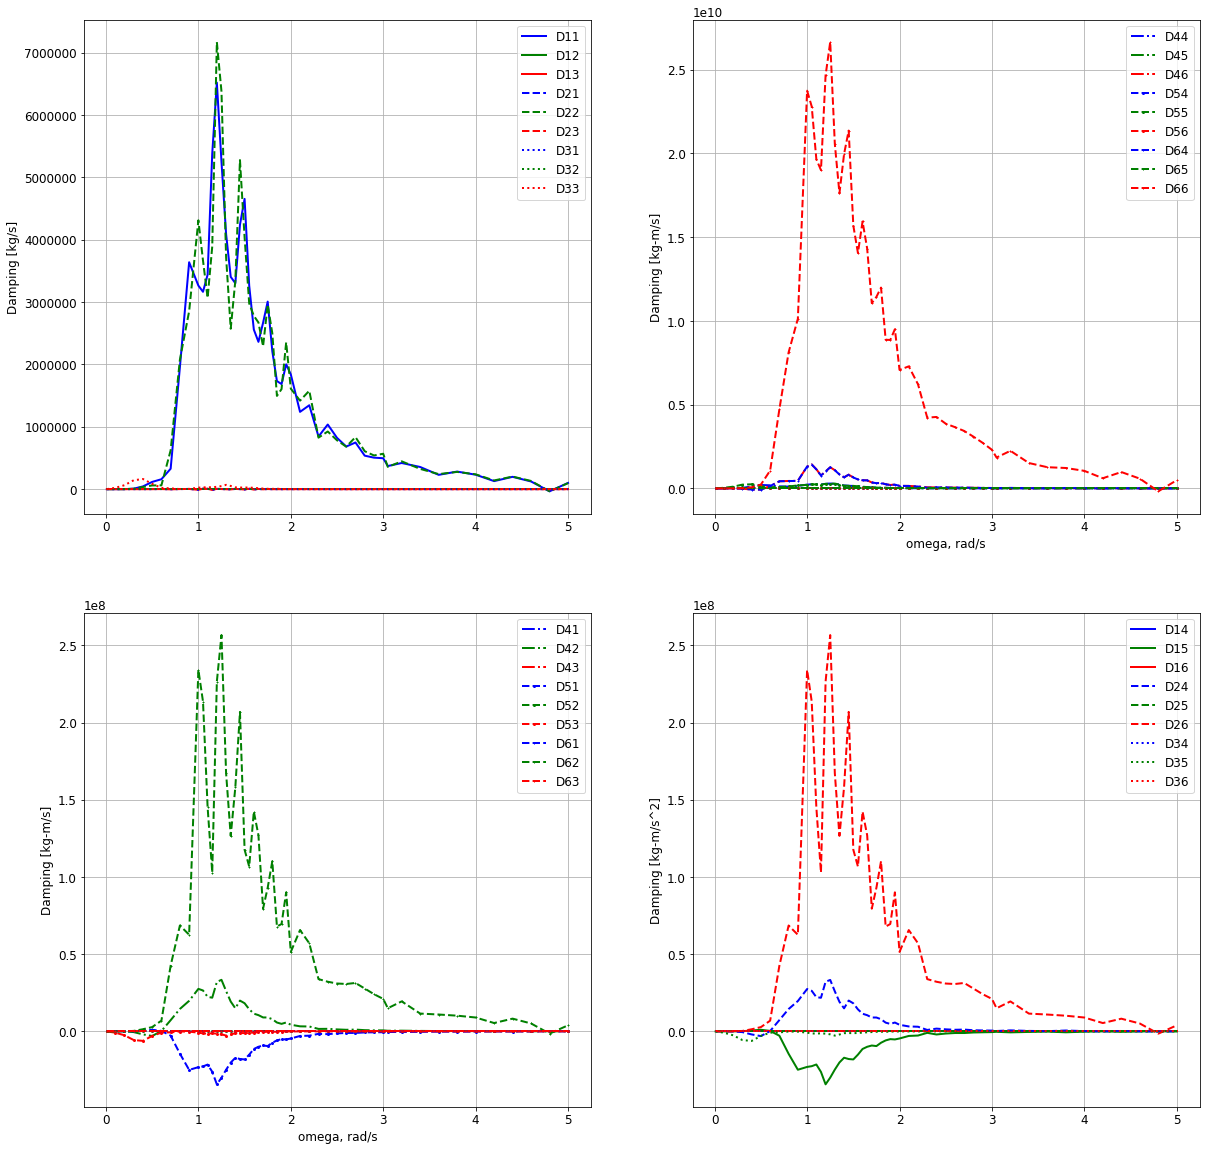

In [25]:
fig, axs = plt.subplots(2, 2)
for ii in np.linspace(0,2,3).astype(int):
    for jj in np.linspace(0,2,3).astype(int):
        axs[0, 0].plot(sim.wave_disc[:,4],sim.DAMPING[:,ii,jj],styles[ii][jj], label=legend_D[ii][jj], linewidth=2, markersize=2)
axs[0,0].legend(loc="upper right")
axs[0,0].set(ylabel='Damping [kg/s]')
axs[0,0].grid(b=True, which='both', axis = 'both')
        
for ii in np.linspace(0,2,3).astype(int):
    for jj in np.linspace(3,5,3).astype(int):
        axs[1, 1].plot(sim.wave_disc[:,4],sim.DAMPING[:,ii,jj],styles[ii][jj], label=legend_D[ii][jj], linewidth=2, markersize=2)        
axs[1,1].legend(loc="upper right")
axs[1,1].set(ylabel='Damping [kg-m/s^2]')
axs[1,1].grid(b=True, which='both', axis = 'both')
        
for ii in np.linspace(3,5,3).astype(int):
    for jj in np.linspace(0,2,3).astype(int):
        axs[1, 0].plot(sim.wave_disc[:,4],sim.DAMPING[:,ii,jj],styles[ii][jj], label=legend_D[ii][jj], linewidth=2, markersize=2)            
axs[1,0].legend(loc="upper right") 
axs[1,0].set(xlabel='omega, rad/s', ylabel='Damping [kg-m/s]')
axs[1,0].grid(b=True, which='both', axis = 'both')
    
        
for ii in np.linspace(3,5,3).astype(int):
    for jj in np.linspace(3,5,3).astype(int):
        axs[0, 1].plot(sim.wave_disc[:,4],sim.DAMPING[:,ii,jj],styles[ii][jj], label=legend_D[ii][jj], linewidth=2, markersize=2)            
axs[0,1].legend(loc="upper right")    
axs[0,1].set(xlabel='omega, rad/s', ylabel='Damping [kg-m/s]')
axs[0,1].grid(b=True, which='both', axis = 'both')


In [69]:
legend_F = ['|$X_1$|','|$X_2$|','|$X_3$|','|$X_4$|','|$X_5$|','|$X_6$|']
legend_T = [r'$\theta_1$',r'$\theta_2$',r'$\theta_3$',r'$\theta_4$',r'$\theta_5$',r'$\theta_6$']

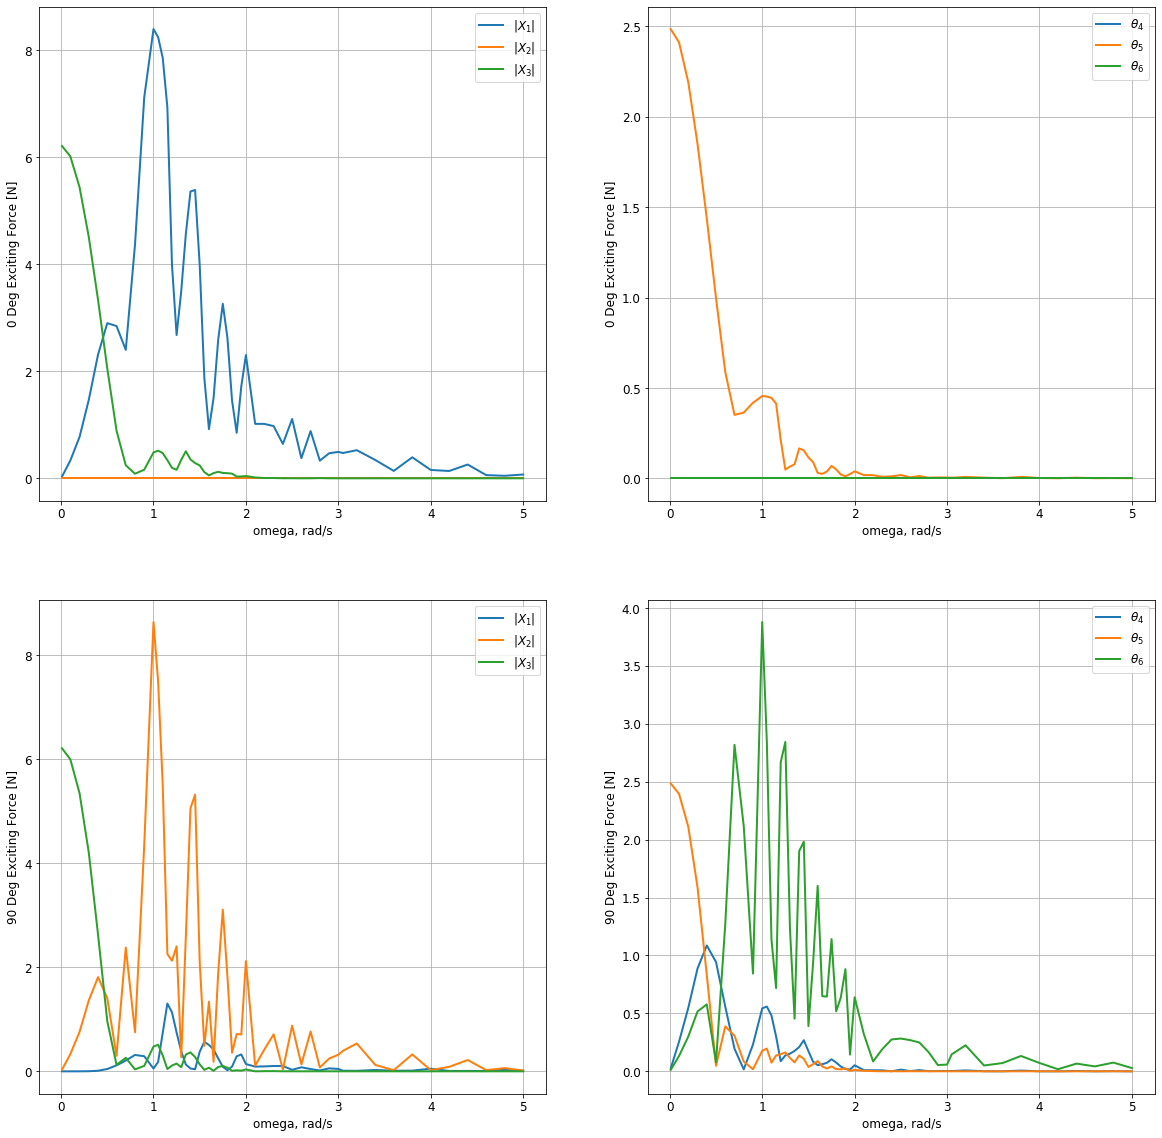

In [70]:
fig, axs = plt.subplots(2,2)
for jj in np.linspace(0,2,3).astype(int):
        axs[0,0].plot(sim.wave_disc[:,4],sim.WAVEEX[0,:,jj,2], label=legend_F[jj], linewidth=2, markersize=2)            
        axs[0,0].legend(loc="upper right") 
        axs[0,0].set(xlabel='omega, rad/s', ylabel='0 Deg Exciting Force [N]')
        axs[0,0].grid(b=True, which='both', axis = 'both')

for jj in np.linspace(3,5,3).astype(int):
        axs[0,1].plot(sim.wave_disc[:,4],sim.WAVEEX[0,:,jj,2], label=legend_T[jj], linewidth=2, markersize=2)            
        axs[0,1].legend(loc="upper right") 
        axs[0,1].set(xlabel='omega, rad/s', ylabel='0 Deg Exciting Force [N]')
        axs[0,1].grid(b=True, which='both', axis = 'both')
        
for jj in np.linspace(0,2,3).astype(int):
        axs[1,0].plot(sim.wave_disc[:,4],sim.WAVEEX[1,:,jj,2], label=legend_F[jj], linewidth=2, markersize=2)            
        axs[1,0].legend(loc="upper right") 
        axs[1,0].set(xlabel='omega, rad/s', ylabel='90 Deg Exciting Force [N]')
        axs[1,0].grid(b=True, which='both', axis = 'both')

for jj in np.linspace(3,5,3).astype(int):
        axs[1,1].plot(sim.wave_disc[:,4],sim.WAVEEX[1,:,jj,2], label=legend_T[jj], linewidth=2, markersize=2)            
        axs[1,1].legend(loc="upper right") 
        axs[1,1].set(xlabel='omega, rad/s', ylabel='90 Deg Exciting Force [N]')
        axs[1,1].grid(b=True, which='both', axis = 'both')
        